In [48]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('Iris Dataset.csv')

In [50]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
np.max(np.array(df["SepalLengthCm"])) - np.min(np.array(df["SepalLengthCm"]))

3.6000000000000005

In [52]:
np.max(np.array(df["SepalWidthCm"])) - np.min(np.array(df["SepalWidthCm"]))

2.4000000000000004

In [53]:
np.max(np.array(df["PetalLengthCm"])) - np.min(np.array(df["PetalLengthCm"]))

5.9

In [54]:
np.max(np.array(df["PetalWidthCm"])) - np.min(np.array(df["PetalWidthCm"]))

2.4

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df.drop(["Id" , "Species"] , axis = 1))

X = pd.DataFrame(scaled_data , columns = ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"])

In [56]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [57]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [58]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [59]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [60]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [67]:
mat_reduced = PCA(X , 3)

In [71]:
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2','PC3'])

In [72]:
principal_df = pd.concat([principal_df , df["Species"]] , axis = 1)

In [73]:
principal_df.head()

,PC1,PC2,PC3,Species
0,0.630361,0.111556,0.016993,Iris-setosa
1,0.623546,-0.100313,0.047120,Iris-setosa
2,0.669793,-0.047220,-0.021648,Iris-setosa
3,0.654633,-0.098791,-0.025214,Iris-setosa
4,0.648263,0.137558,-0.016813,Iris-setosa


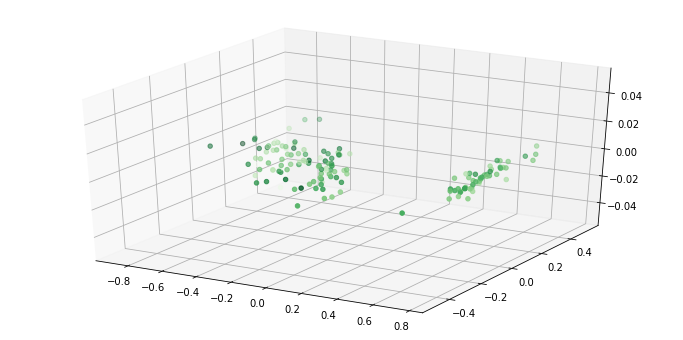

In [81]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,6))
ax = plt.axes(projection='3d')

#ax.plot3D( principal_df['PC1'] , principal_df['PC2'] , principal_df['PC3'] , 'gray')

ax.scatter3D(principal_df['PC1'] , principal_df['PC2'] , c = principal_df['PC3'] , cmap='Greens'  );


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

colors = 10*["g","r","c","b","k"]
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [33]:
#X = df.drop(["Species"] , axis = 1)

[0.75       0.5        0.62711864 0.54166667]
[0.72222222 0.45833333 0.66101695 0.58333333]
[0.66666667 0.41666667 0.6779661  0.66666667]
[0.55555556 0.54166667 0.84745763 1.        ]
[0.77777778 0.41666667 0.83050847 0.83333333]
[0.55555556 0.375      0.77966102 0.70833333]
[0.61111111 0.41666667 0.81355932 0.875     ]
[0.91666667 0.41666667 0.94915254 0.83333333]
[0.83333333 0.375      0.89830508 0.70833333]
[0.66666667 0.20833333 0.81355932 0.70833333]
[0.80555556 0.66666667 0.86440678 1.        ]
[0.61111111 0.5        0.69491525 0.79166667]
[0.58333333 0.29166667 0.72881356 0.75      ]
[0.69444444 0.41666667 0.76271186 0.83333333]
[0.41666667 0.33333333 0.69491525 0.95833333]
[0.58333333 0.5        0.72881356 0.91666667]
[0.61111111 0.41666667 0.76271186 0.70833333]
[0.94444444 0.75       0.96610169 0.875     ]
[0.94444444 0.25       1.         0.91666667]
[0.72222222 0.5        0.79661017 0.91666667]
[0.94444444 0.33333333 0.96610169 0.79166667]
[0.66666667 0.54166667 0.79661017 

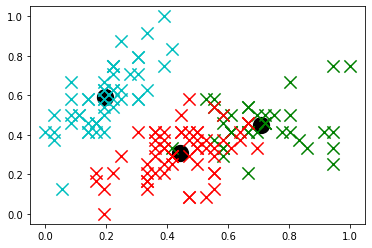

In [35]:
clf = K_Means()
clf.fit(np.array(X))

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        print(featureset)
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()


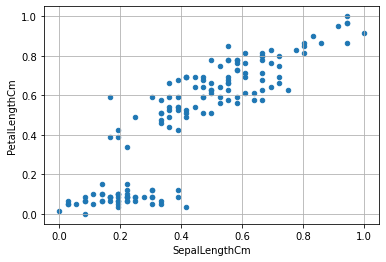

In [30]:

X.plot(kind ="scatter",
          x ='SepalLengthCm',
          y ='PetalLengthCm')
plt.grid()

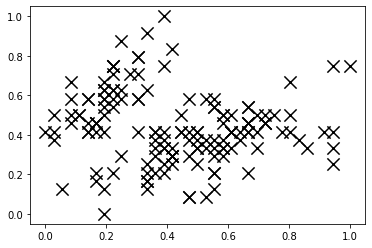

In [29]:
for classification in clf.classifications:
    color = ["black"]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()